In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import statsmodels.api as sm
import missingno as msno

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r"C:\Users\ashle\Desktop\MSDA WGU\Capstone\churn dataset\Customer_Churn_Data.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


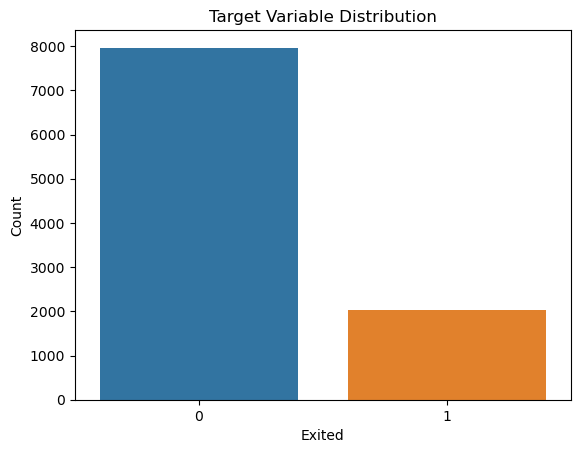

Exited
0    0.796241
1    0.203759
Name: proportion, dtype: float64


In [6]:
# Print a bar chart to visualize the target variable distribution
sns.countplot(x='Exited', data=df)
plt.title('Target Variable Distribution')
plt.ylabel('Count')
plt.show()

#Print value counts
print(df['Exited'].value_counts(normalize=True))


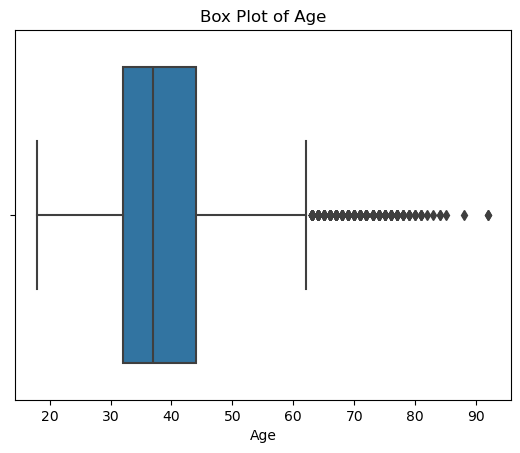

In [7]:
sns.boxplot(x=df['Age'])

plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()


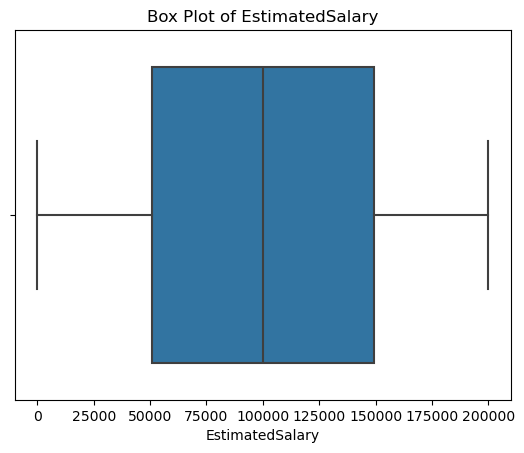

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
sns.boxplot(x=df['EstimatedSalary'])

plt.title('Box Plot of EstimatedSalary')
plt.xlabel('EstimatedSalary')
plt.show()


In [9]:
# Identify and print duplicates
duplicates = df[df.duplicated(keep=False)]
duplicates

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [10]:
# Drop duplicates
df_clean = df.drop_duplicates()
df_clean.shape

(10000, 14)

In [11]:
# Print number of missing values in each column
missing_summary = df_clean.isnull().sum()
print("Missing values per column:\n", missing_summary)

# Define placeholder
placeholders = ['', ' ', 'NA', 'N/A', 'null', '-', '?']

# Strip whitespace from string columns before replacement
df_clean = df_clean.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)

# Replace placeholders with np.nan across all columns
df_clean.replace(placeholders, np.nan, inplace=True)

# Drop null values
df_clean = df_clean.dropna()

# Print the number of missing values in each column after cleaning
missing_summary = df_clean.isnull().sum()
print("\n\nMissing values per column:\n", missing_summary)

Missing values per column:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


Missing values per column:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [12]:
#Identifying Outliers
#Define column variable with all the numeric columns in the data frame
columns = df_clean.select_dtypes(exclude=['object']).drop('Exited', axis=1).columns

#Loop through each numeric column to find outliers
for i in columns:
    #print(")
    # Calculating the first quartile, the third quartile, and the interquartile range. [In-Text Citation: (Hackers Realm)]
    Q1 = df_clean[i].quantile(0.25)
    Q3 = df_clean[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    # Identify outliers
    outliers = df_clean[(df_clean[i] < lower_bound) | (df_clean[i] > upper_bound)]
    #Printing the count and range of outliers
    print("\n\033[1m " + i + ": \033[0m" + "Count of outliers: " + str(len(outliers)))


# Cleaning Outliers
# Z-score capping to cap all columns with outliers with a threshold set at 3 standard deviations from the mean. 
outlierColumns = ['CreditScore', 'Age', 'NumOfProducts']
# Loop through each column that has outliers.
for i in outlierColumns: 
    # Calculate the upper and lower threshold using the Interquartile Range (IQR) method. 
    upperThreshold = df_clean[i].mean() + 3 * df_clean[i].std()
    lowerThreshold = df_clean[i].mean() - 3 * df_clean[i].std()
    #Print upper and lower threshold for each column
    print("\n\033[1m" + i + ": \033[0m Upper Threshold: " + str(upperThreshold) + ' Lower Threshold: ' + str(lowerThreshold))
    
    #Capping outliers for each column on upper and lower limit
    df_clean.loc[(df_clean[i]>=upperThreshold), i] = float(upperThreshold)
    df_clean.loc[(df_clean[i]<=lowerThreshold), i] = float(lowerThreshold)

     # Count outliers after cleaning
    outliers_ = df_clean[(df_clean[i] < lowerThreshold) | (df_clean[i] > upperThreshold)]
    print("Count of Outliers after capping: " + str(len(outliers_)))





 RowNumber: Count of outliers: 0

 CustomerId: Count of outliers: 0

 CreditScore: Count of outliers: 16

 Age: Count of outliers: 359

 Tenure: Count of outliers: 0

 Balance: Count of outliers: 0

 NumOfProducts: Count of outliers: 60

 HasCrCard: Count of outliers: 0

 IsActiveMember: Count of outliers: 0

 EstimatedSalary: Count of outliers: 0

CreditScore:  Upper Threshold: 940.3773051066316 Lower Threshold: 360.62929753442467
Count of Outliers after capping: 0

Age:  Upper Threshold: 70.38633419345116 Lower Threshold: 7.455808663691698
Count of Outliers after capping: 0

NumOfProducts:  Upper Threshold: 3.275265367923586 Lower Threshold: -0.214841198255719
Count of Outliers after capping: 0


C:\Users\ashle\AppData\Local\Temp\ipykernel_5956\628036063.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '940.3773051066316' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[(df_clean[i]>=upperThreshold), i] = float(upperThreshold)
C:\Users\ashle\AppData\Local\Temp\ipykernel_5956\628036063.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3.275265367923586' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[(df_clean[i]>=upperThreshold), i] = float(upperThreshold)


In [13]:
# Check cardinality on categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    unique_vals = df[col].nunique()
    total_vals = len(df)
    print(f"{col}: {unique_vals} unique values ({unique_vals/total_vals:.2%} of total rows)")
high_card_cols = [col for col in cat_cols if df[col].nunique() > 50]  # or any threshold you choose
print("High cardinality columns:", high_card_cols)



Surname: 2932 unique values (29.31% of total rows)
Geography: 3 unique values (0.03% of total rows)
Gender: 2 unique values (0.02% of total rows)
High cardinality columns: ['Surname']


In [14]:
# Re-express Gender variables to be expressed as 1/0.
df_clean['Gender'].replace(to_replace =['Male','Female'], value = [1,0], inplace = True)

# Using label encoder to transform the Geography variable
label_encoder = LabelEncoder()
encodedLabels = label_encoder.fit_transform(df_clean['Geography'])
df_clean['Geography'] = encodedLabels

df_clean

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,0,0,42.0,2,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,2,0,41.0,1,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,0,0,42.0,8,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,0,0,39.0,1,0.00,2.0,0.0,0.0,93826.63,0
5,6,15574012,Chu,645.0,2,1,44.0,8,113755.78,2.0,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771.0,0,1,39.0,5,0.00,2.0,1.0,0.0,96270.64,0
9996,9997,15569892,Johnstone,516.0,0,1,35.0,10,57369.61,1.0,1.0,1.0,101699.77,0
9997,9998,15584532,Liu,709.0,0,0,36.0,7,0.00,1.0,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772.0,1,1,42.0,3,75075.31,2.0,1.0,0.0,92888.52,1


In [15]:
df_clean.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore        float64
Geography            int32
Gender               int64
Age                float64
Tenure               int64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

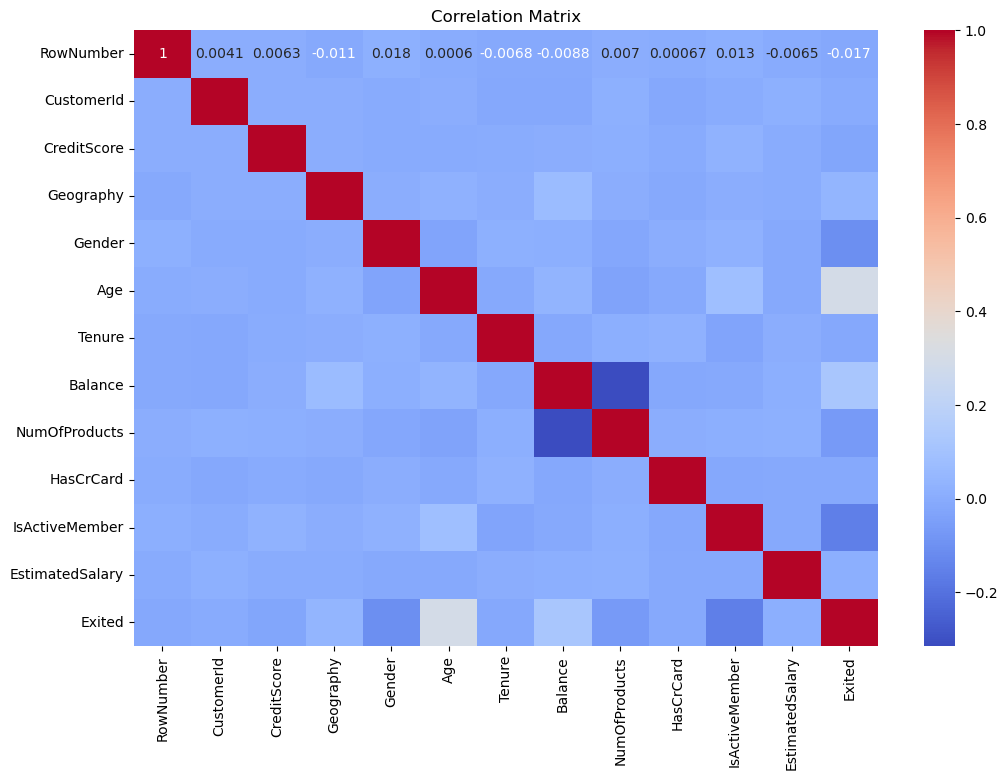

In [16]:
# Select numeric columns
df_numeric = df_clean.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()




In [17]:
# VIF to check multicollinearity
print("\n\033[1m VIF Check: \033[0m")
X = sm.add_constant(df_numeric.drop('Exited', axis=1)) 
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


 VIF Check: 
            feature           VIF
0             const  47695.258688
1         RowNumber      1.000840
2        CustomerId      1.001218
3       CreditScore      1.001129
4         Geography      1.006527
5            Gender      1.002618
6               Age      1.010510
7            Tenure      1.002178
8           Balance      1.117690
9     NumOfProducts      1.113456
10        HasCrCard      1.001349
11   IsActiveMember      1.009606
12  EstimatedSalary      1.001177


In [18]:
# Using SelectKBest to identify the features with the highest p-values
X = df_numeric.drop(["Exited"],axis=1)
y = df_numeric['Exited']
feature_names = X.columns
skbest = SelectKBest(score_func=f_regression, k=5)
X_new = skbest.fit_transform(X, y)
print(X_new.shape)
# Finding p-values greater than .05 to select statiscially significant columns
p_values = pd.DataFrame({'Feature':X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
p_values[p_values['p_value']<.05]
features_to_keep = p_values['Feature'][p_values['p_value']<.05]
predictors = df_clean[features_to_keep]

# Print features to keep and the associated p-values
features_to_keep_df = p_values[p_values['p_value'] < 0.05]
print(features_to_keep_df)


(9996, 5)
           Feature        p_value
5              Age  1.688806e-197
10  IsActiveMember   1.828609e-55
7          Balance   1.151085e-32
4           Gender   1.371363e-26
8    NumOfProducts   1.163457e-10
3        Geography   3.315737e-04
2      CreditScore   7.275868e-03


In [19]:
# Splitting the data into stratified train/test sets
X = predictors
y = df_clean['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=24)

In [20]:
# Create and fit the Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=12)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Accuracy: 0.8520
ROC-AUC: 0.8511


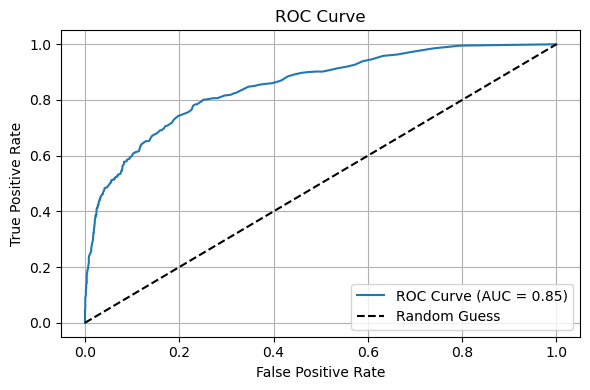

In [21]:
# Convert predicted probabilities to binary labels using 0.5 threshold
y_pred_binary = [1 if prob >= 0.5 else 0 for prob in y_pred]

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"\n\033[1mAccuracy:\033[0m {accuracy:.4f}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"\033[1mROC-AUC:\033[0m {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
labels = ['No Churn', 'Churn']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("\n\033[1mConfusion Matrix:\033[0m")
print(cm_df)


Confusion Matrix:
          No Churn  Churn
No Churn      1494     98
Churn          198    210


In [23]:
# Flag customers with churn probability above 0.75
high_risk_flags = [1 if prob >= 0.75 else 0 for prob in y_pred]
X_test_flagged = X_test.copy()
X_test_flagged['Churn_Probability'] = y_pred
X_test_flagged['High_Risk_Flag'] = high_risk_flags

# Create a prioritized list of high-value churn risks
priority_list = X_test_flagged[X_test_flagged['High_Risk_Flag'] == 1].sort_values(by='Balance', ascending=False)
priority_list

,Age,IsActiveMember,Balance,Gender,NumOfProducts,Geography,CreditScore,Churn_Probability,High_Risk_Flag
9920,49.0,1.0,204510.94,0,1.0,0,678.0,0.755,1
4784,53.0,0.0,187602.18,0,1.0,2,664.0,0.825,1
8098,68.0,0.0,183555.24,0,1.0,0,770.0,0.875,1
413,41.0,1.0,181461.48,0,3.0,1,693.0,0.990,1
1341,41.0,0.0,176845.41,0,3.0,0,794.0,0.990,1
...,...,...,...,...,...,...,...,...,...
9084,47.0,0.0,0.00,0,1.0,2,686.0,0.960,1
2989,45.0,0.0,0.00,0,1.0,2,703.0,0.905,1
5593,50.0,0.0,0.00,1,1.0,2,617.0,0.875,1
268,39.0,0.0,0.00,0,1.0,2,549.0,0.785,1


In [25]:
priority_list.describe()

,Age,IsActiveMember,Balance,Gender,NumOfProducts,Geography,CreditScore,Churn_Probability,High_Risk_Flag
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.0
mean,50.181287,0.269006,78715.356257,0.391813,1.628523,0.736842,640.337013,0.900117,1.0
std,7.831828,0.444745,61060.133331,0.489589,0.926853,0.732272,100.818636,0.076264,0.0
min,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,360.629298,0.750000,1.0
25%,46.000000,0.000000,0.000000,0.000000,1.000000,0.000000,564.500000,0.835000,1.0
50%,49.000000,0.000000,102286.600000,0.000000,1.000000,1.000000,642.000000,0.905000,1.0
75%,55.000000,1.000000,122231.945000,1.000000,3.000000,1.000000,710.500000,0.972500,1.0
max,68.000000,1.000000,204510.940000,1.000000,3.275265,2.000000,850.000000,1.000000,1.0


In [27]:
priority_list.head(17)

,Age,IsActiveMember,Balance,Gender,NumOfProducts,Geography,CreditScore,Churn_Probability,High_Risk_Flag
9920,49.0,1.0,204510.94,0,1.000000,0,678.0,0.755,1
4784,53.0,0.0,187602.18,0,1.000000,2,664.0,0.825,1
8098,68.0,0.0,183555.24,0,1.000000,0,770.0,0.875,1
413,41.0,1.0,181461.48,0,3.000000,1,693.0,0.990,1
1341,41.0,0.0,176845.41,0,3.000000,0,794.0,0.990,1
7570,32.0,0.0,175464.85,1,3.000000,0,697.0,0.885,1
4166,45.0,0.0,174088.30,0,3.275265,2,850.0,1.000,1
4435,64.0,0.0,169362.43,0,1.000000,1,698.0,0.910,1
7984,46.0,0.0,161798.53,1,1.000000,0,464.0,0.790,1
2,42.0,0.0,159660.80,0,3.000000,0,502.0,0.965,1


In [ ]:

# labels = ['No Churn', 'Churn']
# cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# print("Confusion Matrix:")
# print(cm_df)

# sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu', annot_kws={"size": 14})


# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix')
# plt.show()
